In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

In [48]:
try:
    spam_data = pd.read_csv("C:/Users/Admin/Downloads/enron_spam_data (1).csv", encoding='utf-8')
except UnicodeDecodeError:
    # If there's a UnicodeDecodeError, try reading with 'latin1' encoding
    spam_data= pd.read_csv("C:/Users/Admin/Downloads/enron_spam_data (1).csv", encoding='latin1')

In [49]:
spam_data

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [50]:
spam_data.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [51]:
spam_data.describe()

,Message ID
count,33716.000000
mean,16857.500000
std,9733.115174
min,0.000000
25%,8428.750000
50%,16857.500000
75%,25286.250000
max,33715.000000


In [52]:
spam_data.isnull().sum()

Message ID      0
Subject       289
Message       371
Spam/Ham        0
Date            0
dtype: int64

In [55]:
# Load your dataset (assuming it was successfully loaded before the error)
file_path = r"C:\Users\admin\Downloads\enron_spam_data (1).csv"
spam_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Store original cleaned text data for later
original_cleaned_data = spam_data[['Subject', 'Message']].copy()

# Columns to be cleaned
cleaned_columns = ['Subject', 'Message']

# Convert columns to numeric (if necessary)
spam_data['Subject'] = pd.to_numeric(spam_data['Subject'], errors='coerce')
spam_data['Message'] = pd.to_numeric(spam_data['Message'], errors='coerce')

# Fill null values with mean (for demonstration)
for col in cleaned_columns:
    mean_value = spam_data[col].mean()
    spam_data[col].fillna(mean_value, inplace=True)

# Print null values after imputation
print("Null values in spam data after imputation:")
print(spam_data.isnull().sum())

# Revert numeric columns back to original cleaned text format
spam_data[['Subject', 'Message']] = original_cleaned_data

# Verify columns reverted to text format without null values
cleaned_spam_data = spam_data.dropna(subset=['Subject', 'Message'])

# Print cleaned spam_data
print("\nCleaned spam_data without null values:")
print(cleaned_spam_data.head())

Null values in spam data after imputation:
Message ID    0
Subject       0
Message       0
Spam/Ham      0
Date          0
dtype: int64

Cleaned spam_data without null values:
   Message ID                       Subject  \
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   
5           5      mcmullen gas for 11 / 99   

                                             Message Spam/Ham        Date  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14  
5  jackie ,\nsince the inlet to 3 river plant is ...      ham  1999-12-14  


In [56]:
spam_data.info()
spam_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [57]:
spam_data =spam_data[['Subject', 'Message']]

In [58]:
spam_data

,Subject,Message
0,christmas tree farm pictures,NaN
1,"vastar resources , inc .","gary , production from the high island larger ..."
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc
3,re : issue,fyi - see note below - already done .\nstella\...
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...
...,...,...
33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np..."
33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...
33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...
33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...


In [59]:
spam_data.head()

,Subject,Message
0,christmas tree farm pictures,NaN
1,"vastar resources , inc .","gary , production from the high island larger ..."
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc
3,re : issue,fyi - see note below - already done .\nstella\...
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...


In [60]:
print (spam_data.columns)

Index(['Subject', 'Message'], dtype='object')


In [65]:
cleaned_spam_data['Spam/Ham'].value_counts()

Spam/Ham
spam    16614
ham     16493
Name: count, dtype: int64

# Performed EDA ( Exploratory data analysis) on spam/ham dataset 

# Distribution of Spam and Ham Emails

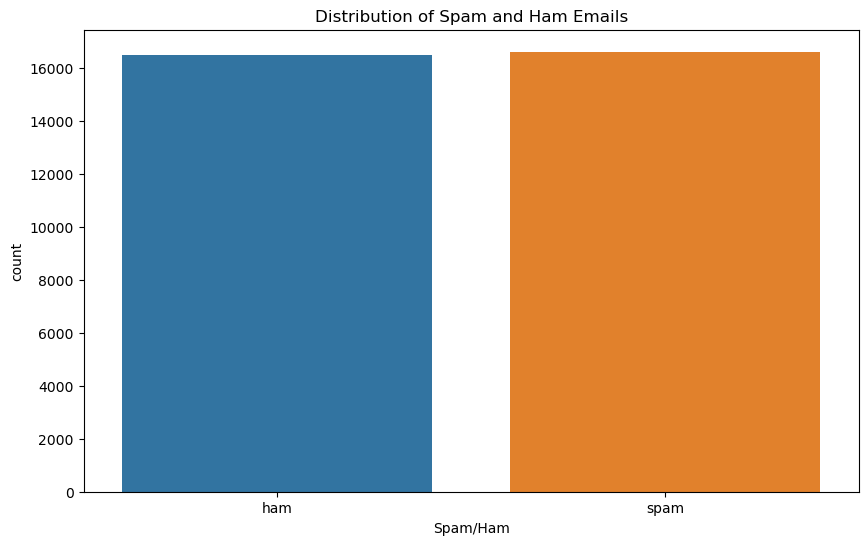

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(data=cleaned_spam_data, x='Spam/Ham' )
plt.title('Distribution of Spam and Ham Emails')
plt.show()

# Plot the distribution of message ID

C:\Users\admin\AppData\Local\Temp\ipykernel_11908\2083377648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_spam_data['Message Length'] = cleaned_spam_data['Message'].str.len()
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


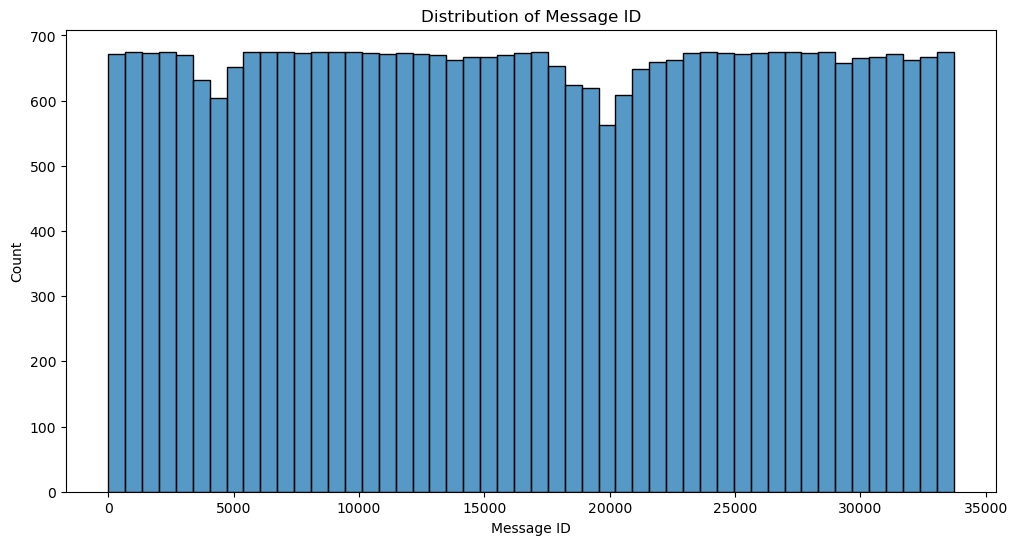

In [76]:
cleaned_spam_data['Message Length'] = cleaned_spam_data['Message'].str.len()

plt.figure(figsize=(12, 6))
sns.histplot(data=cleaned_spam_data, x='Message ID', bins=50)
plt.title('Distribution of Message ID')
plt.show()

# Plot the distribution of emails over time

C:\Users\admin\AppData\Local\Temp\ipykernel_11908\2397635832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_spam_data['Date'] = pd.to_datetime(cleaned_spam_data['Date'], errors='coerce')


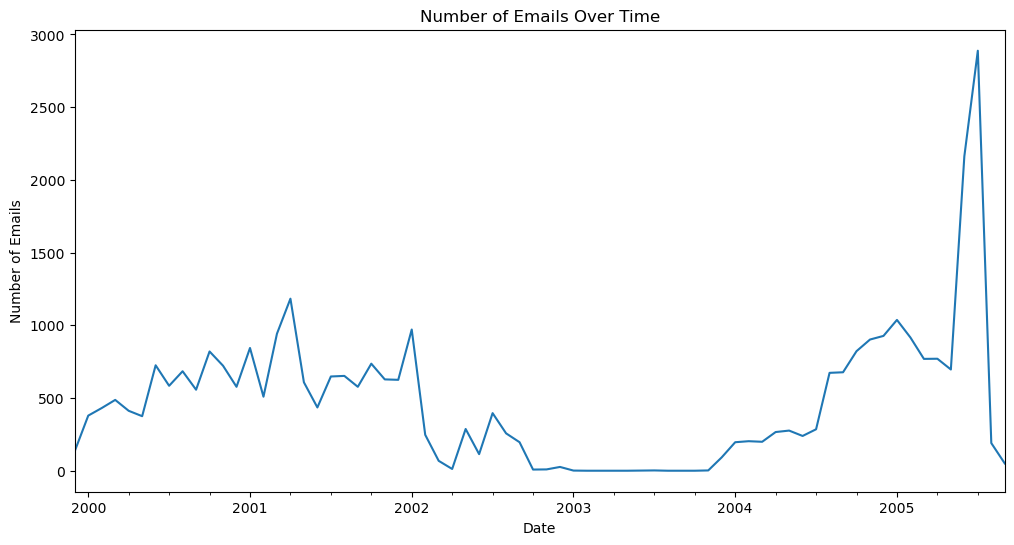

In [77]:
cleaned_spam_data['Date'] = pd.to_datetime(cleaned_spam_data['Date'], errors='coerce')
plt.figure(figsize=(12, 6))
cleaned_spam_data.set_index('Date')['Spam/Ham'].resample('M').count().plot()
plt.title('Number of Emails Over Time')
plt.ylabel('Number of Emails')
plt.xlabel('Date')
plt.show()

# Plot the distribution of subject lengths for spam and ham

C:\Users\admin\AppData\Local\Temp\ipykernel_11908\3576879404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_spam_data['Subject Length'] = spam_data['Subject'].str.len()
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


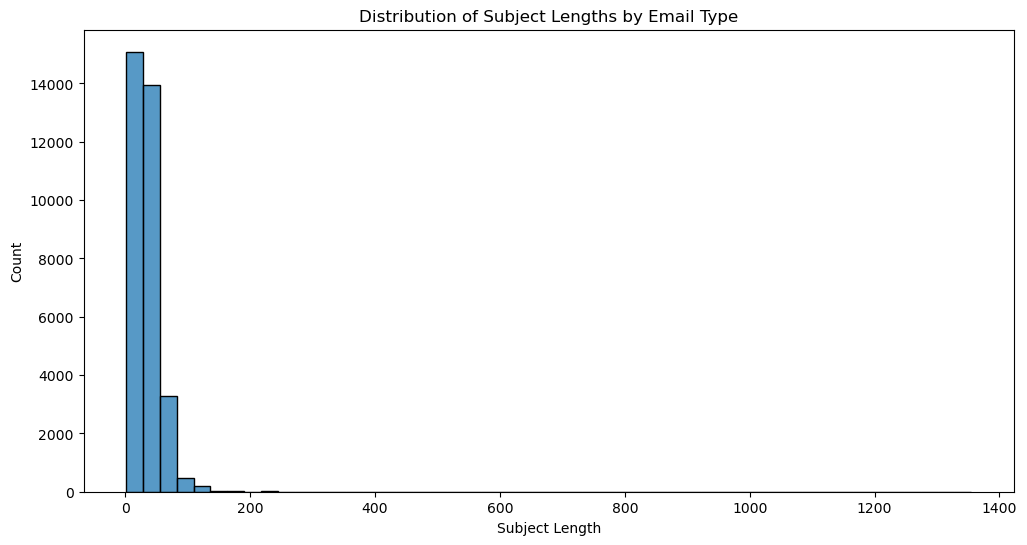

In [83]:
cleaned_spam_data['Subject Length'] = spam_data['Subject'].str.len()
plt.figure(figsize=(12, 6))
sns.histplot(data=cleaned_spam_data, x='Subject Length',bins=50)
plt.title('Distribution of Subject Lengths by Email Type')
plt.show()

# Performed Countvectorizer on spam/ham dataset

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [98]:
countvec=CountVectorizer(ngram_range=(1,4),
                        stop_words='english',
                        strip_accents='unicode',
                        max_features=1000)

In [99]:
#Combine 'Subject' and 'Message' columns into a single text column
text_data = cleaned_spam_data['Subject'] + " " + cleaned_spam_data['Message']

#Initialize CountVectorizer
countvec = CountVectorizer()

#Fit and transform to create bag-of-words (bow)
bow = countvec.fit_transform(text_data)

#Set X and Y for model training
X = bow
Y = cleaned_spam_data['Spam/Ham']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Initialize Multinomial Naive Bayes model
mnb = MultinomialNB()

#Train the model
mnb.fit(X_train, y_train)

#Predictions
y_pred = mnb.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix: ", confusion_matrix(y_test,y_pred))
print("Confusion matrix: ", classification_report(y_test,y_pred))

Accuracy: 0.9888251283600121
Confusion matrix:  [[3264   43]
 [  31 3284]]
Confusion matrix:                precision    recall  f1-score   support

         ham       0.99      0.99      0.99      3307
        spam       0.99      0.99      0.99      3315

    accuracy                           0.99      6622
   macro avg       0.99      0.99      0.99      6622
weighted avg       0.99      0.99      0.99      6622

